In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [22]:
targetdir = '/Users/aimachine/Downloads/h_variation/Actin200/Result/'

Actinimage = '/Users/aimachine/Downloads/h_variation/Actin200/ActinLineScan.tif'

Membraneimage = '/Users/aimachine/Downloads/h_variation/Actin200/MembraneLineScan.tif'

#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.069
#Enter the number of pixels to be included in the fit
FitaroundInside = 6
FitaroundOutside = 20
#Symmetric psf as input (micrometers)
psf = 0.170
inisigmaguess =  psf


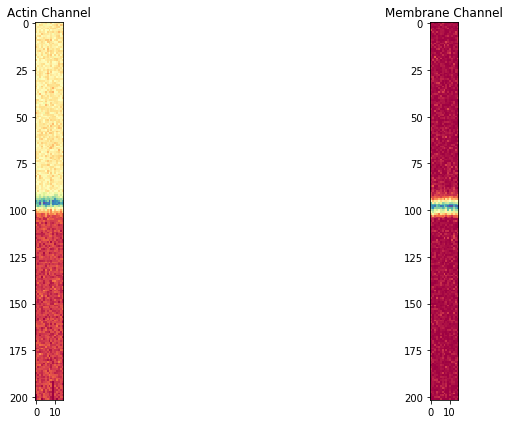

In [23]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Time point: 0


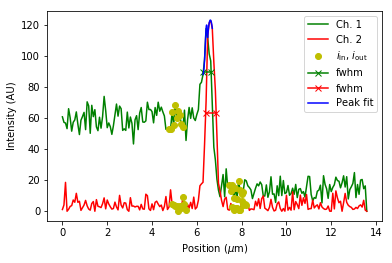

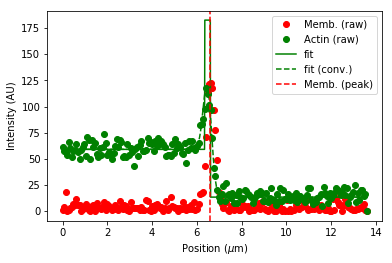

Time point: 10


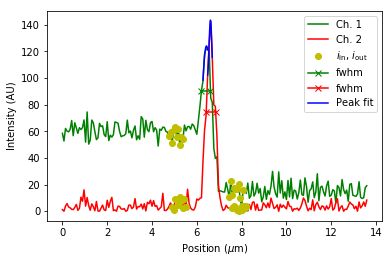

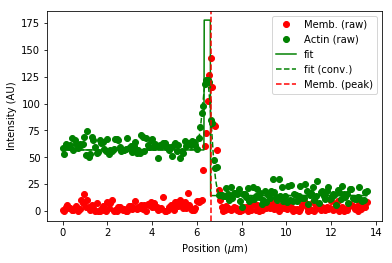

Ransac Slope =  -2.538e-03
Regression Slope =  -2.538e-03
Mean Thickness (After outlier removal) =  0.208 um


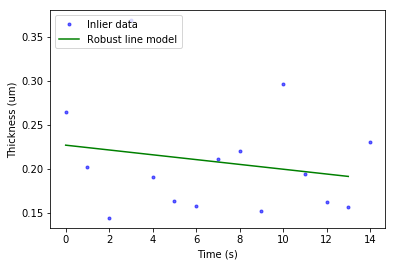

CPU times: user 17 s, sys: 186 ms, total: 17.2 s
Wall time: 17.1 s


In [24]:
%%time
Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, FitaroundInside, FitaroundOutside, psf, inisigmaguess)
Thickness_time = np.column_stack([Time, Thickness])

show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.9, max_trials=1000, Xrange = Time[-1], displayoutlier = False)

In [25]:
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook

hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
 if listhist[i] > 0:
  mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
  p.add_layout(mytext)
show(p)
print(np.mean(Thickness))

Loading BokehJS ...

0.20770419293864956
